In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.HUGADB)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-11 11:46:04,591 - whar-datasets - INFO - Running DownloadingStep
2026-02-11 11:46:04,591 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-11 11:46:04,592 - whar-datasets - INFO - Hash is up to date
2026-02-11 11:46:04,592 - whar-datasets - INFO - Running ParsingStep
2026-02-11 11:46:04,592 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-11 11:46:04,593 - whar-datasets - INFO - Hash is not up to date
2026-02-11 11:46:04,593 - whar-datasets - INFO - Checking download
2026-02-11 11:46:04,593 - whar-datasets - INFO - Download exists
2026-02-11 11:46:04,593 - whar-datasets - INFO - Parsing to common format
Creating sessions: 100%|██████████| 4093/4093 [00:12<00:00, 329.56it/s]
2026-02-11 11:46:22,253 - whar-datasets - INFO - Saving common format
2026-02-11 11:46:24,459 - whar-datasets - INFO - Running WindowingStep
2026-02-11 11:46:24,459 - whar-datasets - INFO - Checking hash for WindowingStep
2026-02-11 11:46:24,460 - whar-datasets - INFO - Hash is

[########################################] | 100% Completed | 5.73 ss


2026-02-11 11:46:30,516 - whar-datasets - INFO - Common format validated.
2026-02-11 11:46:30,517 - whar-datasets - INFO - Compute windowing
2026-02-11 11:46:30,517 - whar-datasets - INFO - Selecting activities
2026-02-11 11:46:30,526 - whar-datasets - INFO - Processing sessions (parallelized)


[########################################] | 100% Completed | 21.82 s


2026-02-11 11:46:52,789 - whar-datasets - INFO - Saving windowing
2026-02-11 11:46:59,098 - whar-datasets - INFO - Loading windowing
2026-02-11 11:46:59,109 - whar-datasets - INFO - activity_ids from 0 to 11
2026-02-11 11:46:59,109 - whar-datasets - INFO - subject_ids from 0 to 17


In [4]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_15 22041 5510 1575
subject_10 22388 5597 1141
subject_5 21632 5408 2086
subject_7 22216 5553 1357
subject_17 22178 5544 1404
subject_0 17925 4481 6720
subject_12 21824 5455 1847
subject_3 22079 5519 1528
subject_2 22907 5726 493
subject_13 22141 5535 1450
subject_4 22331 5582 1213
subject_11 22203 5550 1373
subject_6 21922 5480 1724
subject_8 22501 5625 1000
subject_9 22236 5558 1332
subject_16 21980 5494 1652
subject_1 23072 5768 286
subject_14 22545 5636 945


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(True)

2026-02-11 11:46:59,183 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:46:59,184 - whar-datasets - INFO - Running SamplingStep
2026-02-11 11:46:59,184 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-11 11:46:59,186 - whar-datasets - INFO - Hash is not up to date
2026-02-11 11:47:01,890 - whar-datasets - INFO - Computing samples
2026-02-11 11:47:01,891 - whar-datasets - INFO - Getting normalization parameters
2026-02-11 11:47:02,654 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 18.06 s


2026-02-11 11:47:21,324 - whar-datasets - INFO - Saving samples
2026-02-11 11:47:22,527 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)
print(len(loader))

29126


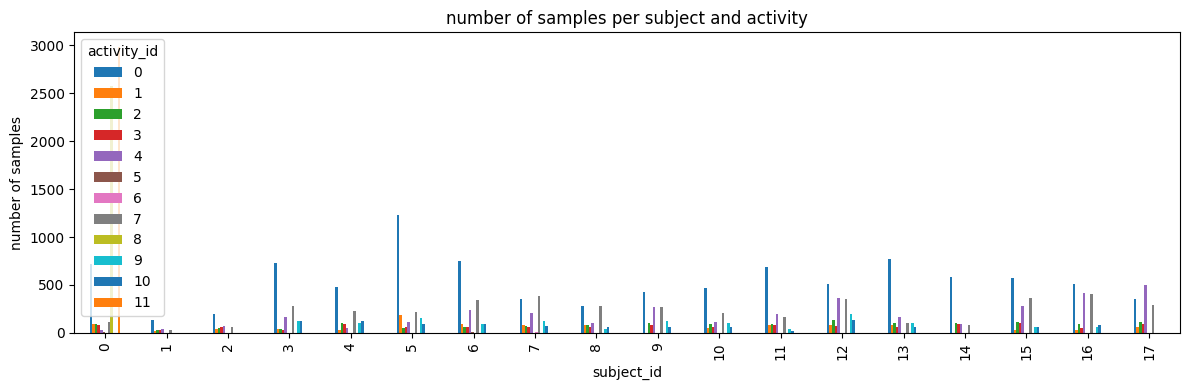

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 8, Subject: 0')

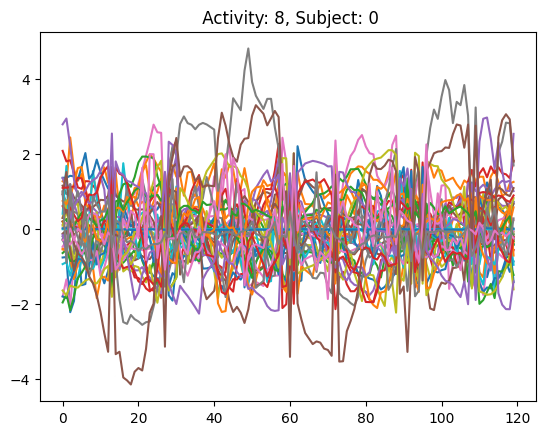

In [36]:
subject_id = None  # 2
activity_id = None  # 3

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")